# Iowa Housing Pricing: Data Cleaning & Prep

### Contents

- [Import Packages & Data](#Step-0:-Plan-the-Date-|-Import-Packages-&-Data)
- I. [Initial EDA: Univariate Investigation](#Step-1:-Getting-to-Know-You)
    - a. [Initial Findings](#First-Glance)
    - b. [Basic Visualization](#Basic-Visualization)
- II. [Missingness Analysis](#Step-2:-Missingness-Analysis)
    - a. [Initial Results](#Missingness-Results-&-Notes)
    - b. [Garage](#Garage-Investigation)
    - c. [Basement](#Basement-Investigation)
    - d. [Masonry](#Masonry-Investigation)
    - e. [Other Oddities](#Other-Oddities)
    - f. [Corrections Agenda](#Corrections-Agenda)
- III. [Encoding & Processing]()

### Introduction & Background
INSERT INTRO HERE

# Step 0: Plan the Date | Import Packages & Data

In [1]:
# Import packages etc.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import datetime
import pickle
from scipy import stats
from sklearn.model_selection import train_test_split

# Import data & generate 80/20 train-test split
iowa_housing = pd.read_csv('train.csv')
sample_result = pd.read_csv('sample_submission.csv')
iowa_xtrain, iowa_xtest, iowa_ytrain, iowa_ytest = train_test_split(iowa_housing.iloc[:, :-1], 
                                                                   iowa_housing.iloc[:, -1:],
                                                                   test_size = 0.2,
                                                                   random_state = 430)

In [2]:
testset = pd.read_csv('test.csv')
testset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
iowa_xtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1179,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
755,756,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
761,762,30,RM,60.0,6911,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
612,613,60,RL,NaN,11885,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
print("DF Shape: " + str(iowa_xtrain.shape))

DF Shape: (1168, 80)


In [5]:
# Investigate the provided description
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
iowa_xtrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
iowa_xtrain.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
iowa_xtrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1168.000000,1168.000000,967.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1163.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,725.299658,57.534247,70.026887,10393.406678,6.074486,5.600171,1971.190068,1985.026541,99.828891,440.125000,...,472.457192,95.757705,47.041096,20.976884,3.953767,15.322774,2.261986,46.544521,6.328767,2007.822774
std,421.199659,42.660038,24.817205,8953.287777,1.376918,1.109390,29.985026,20.523612,177.868265,457.626015,...,214.676321,126.697280,65.671458,59.808351,31.870312,56.889536,34.583206,542.403700,2.722491,1.324838
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,363.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.750000,0.000000,0.000000,...,329.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,726.500000,50.000000,69.000000,9444.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,...,477.500000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1087.250000,70.000000,80.000000,11437.000000,7.000000,6.000000,2000.000000,2004.000000,158.000000,700.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,576.000000,15500.000000,12.000000,2010.000000


In [9]:
##################################
### Col Types & Digging Deeper ###
##################################

# Differentiate Numerical Features & Categorical Features
numcols = iowa_xtrain.describe().columns.to_list()
# Describe() includes numericals with missing vals
catcols = iowa_xtrain.drop(labels = numcols, axis = 1).columns.to_list()

print('# of Numerical Cols: '+ str(len(numcols)))
print('# of Categorical Cols: ' + str(len(catcols))+ '\n')
print('Total Missing Cells: '+ str(iowa_xtrain.isna().sum().sum()))

# of Numerical Cols: 37
# of Categorical Cols: 43

Total Missing Cells: 5553


### First Glance
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

In general, we have things sorted as they ought to be, from the jump, however there are a few columns that stick out in the numerical section that require correction regarding their contents & classification:
- **MSSubClass** is listed numerically because its numerical values were interpreted *as* ints, where they represented categorical descriptions instead.
- There are 5 time-related columns that need sorting:
    - **YearBuilt** | Int Yrs
    - **YearRemodAdd** | Int Yrs
    - **GarageYrBlt** | Int Yrs
    - **MoSold** | Int values, ranging 1-12
    - **YrSold** | Int Yrs

Rather than categorize by time, we can calculate similar values in order to obtain potentially useful values: rathher than YearBuilt, we can use YrsSinceBlt. Likewise YrsSinceRemod, GarageYrsSinceBlt, YrsSinceSold. 

Month Sold does not yield as clearly a sense of time. Instead it may prove useful as a categorical variable; there is a [popular conception](https://www.zillow.com/sellers-guide/best-time-to-sell/) that time of year DOES play a role in sale value.


In [10]:
def initial_corrections(df):
    # MoSold & MSSubClass: int --> str
    df['MoSold'] = df['MoSold'].astype(str)
    df['MSSubClass'] = df['MSSubClass'].astype(str)
    
    # Time Alterations: year --> years since
    CurrentYr = int(datetime.date.today().strftime('%Y'))
    timecols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
    for col in timecols:
        df[col] = df[col].apply(lambda x: CurrentYr - x)
    df.rename(columns = {'YearBuilt':'YrsSinceBlt',
                        'YearRemodAdd':'YrsSinceRemod',
                        'GarageYrBlt':'GarageYrsSinceBlt',
                        'YrSold':'YrsSinceSold'}, inplace = True)
    return df

In [11]:
iowa_xtrain = initial_corrections(iowa_xtrain)
iowa_xtrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrsSinceSold,SaleType,SaleCondition
1179,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,15,WD,Normal
755,756,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,12,WD,Normal
425,426,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,9,12,WD,Normal
761,762,30,RM,60.0,6911,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,12,WD,Normal
612,613,60,RL,NaN,11885,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,12,WD,Normal


### Basic Visualization
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

Here we will attempt to appreciate a general understanding of our data set and express it in extremely simple, if extensive, graphical terms - **the naive approach**, if you will. We know from our above explorations that there will be missing data, specifically 'nan'. In order to achieve our goals, we will simply include them categorically, using fillna().

In [12]:
def basic_bar_plotting(df):
    # define graphical bounds
    rows = int(np.ceil(len(df.columns) / 3))
    fig, axs = plt.subplots(rows, 3, figsize = (12, (4 * rows)))
    
    # use Seaborne to plot both Numerical & Categorical Features
    for ax, feature in zip(axs.flat, df.columns.to_list()):
        try:
            sns.histplot(df[feature], ax = ax)
        except:
            sns.histplot(df[feature].fillna('N/A'), ax = ax)

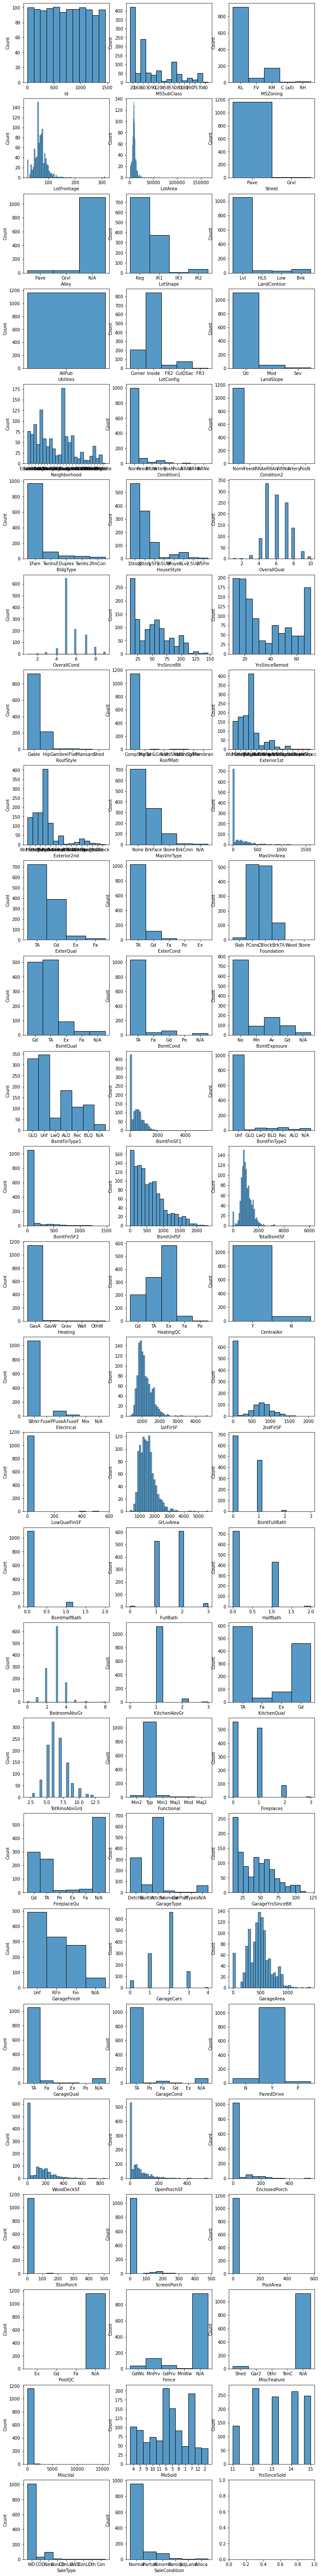

In [13]:
##################################
### Generate Histplot Overview ###
##################################

basic_bar_plotting(iowa_xtrain)

# Step 2: Missingness Analysis
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

In the above visualizations, we took care to avoid issues with our missing data, however, we do need to investigate it further as well as their interrelations.

<AxesSubplot:>

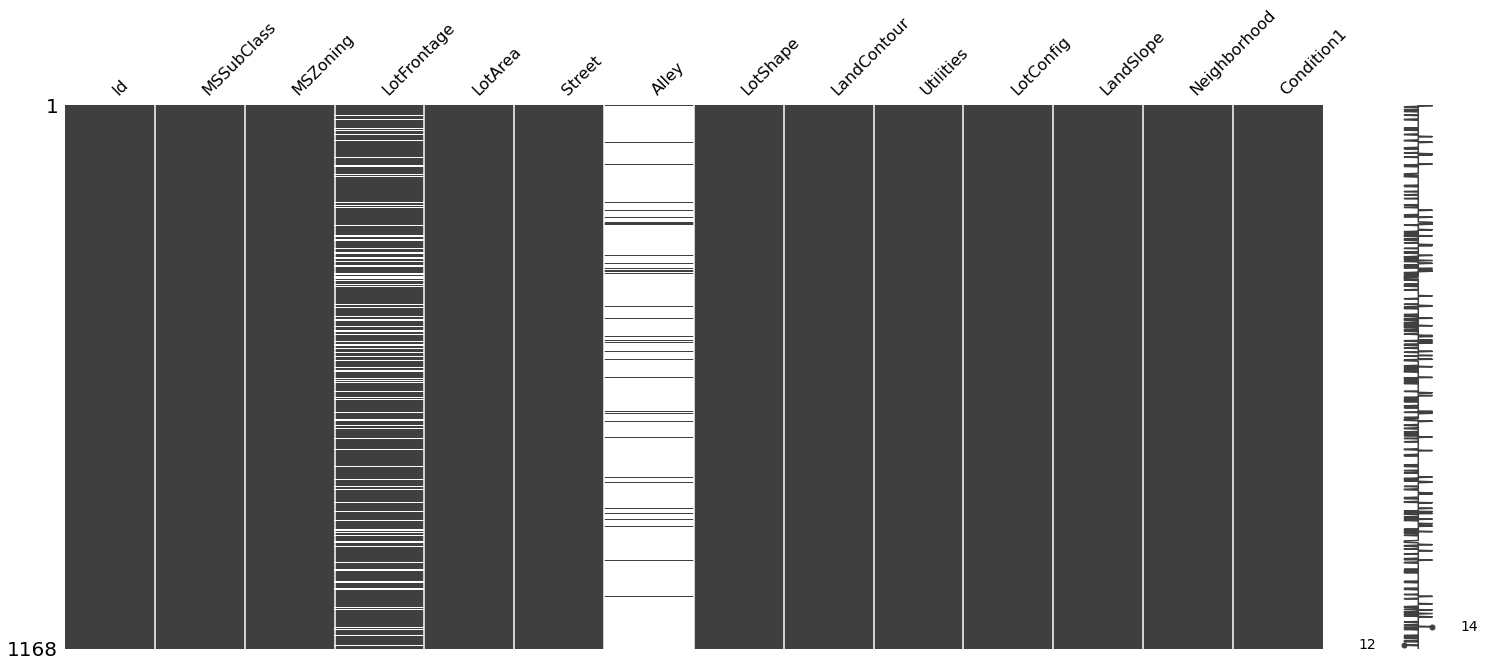

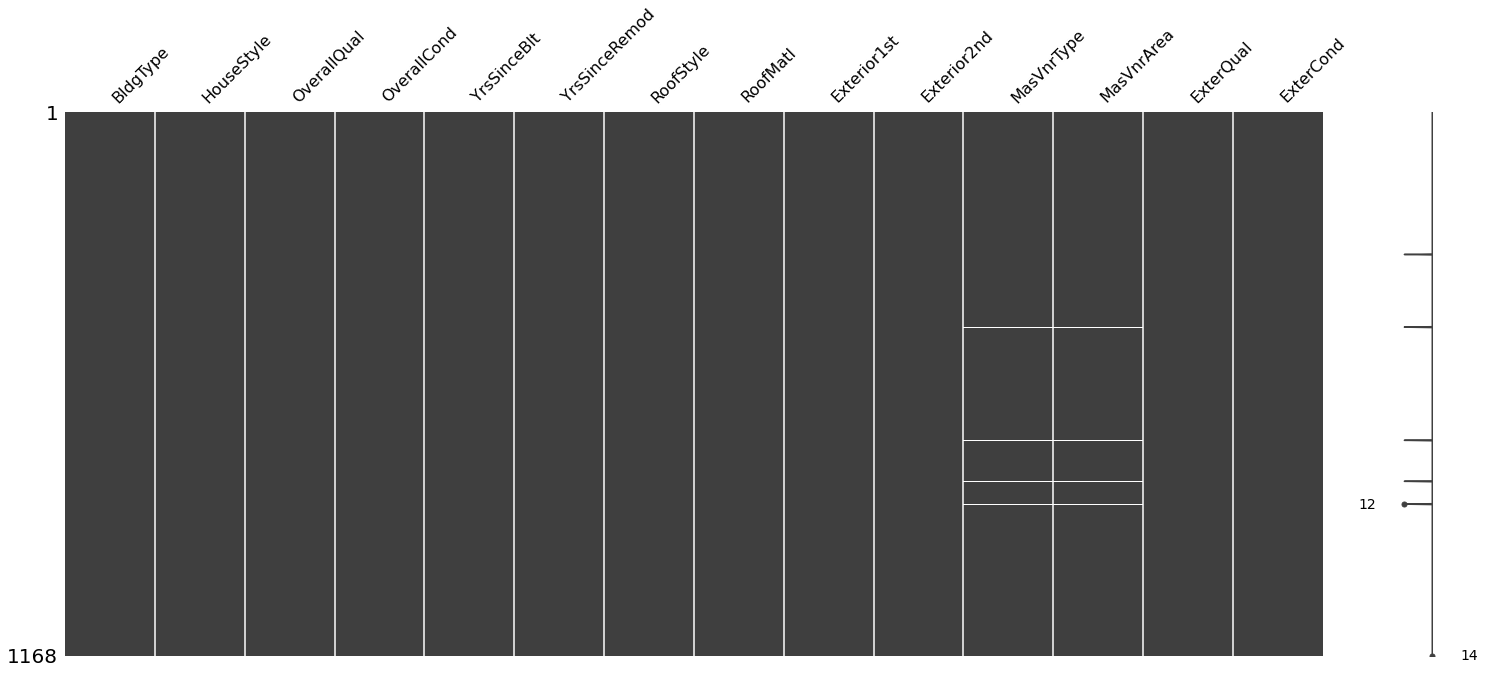

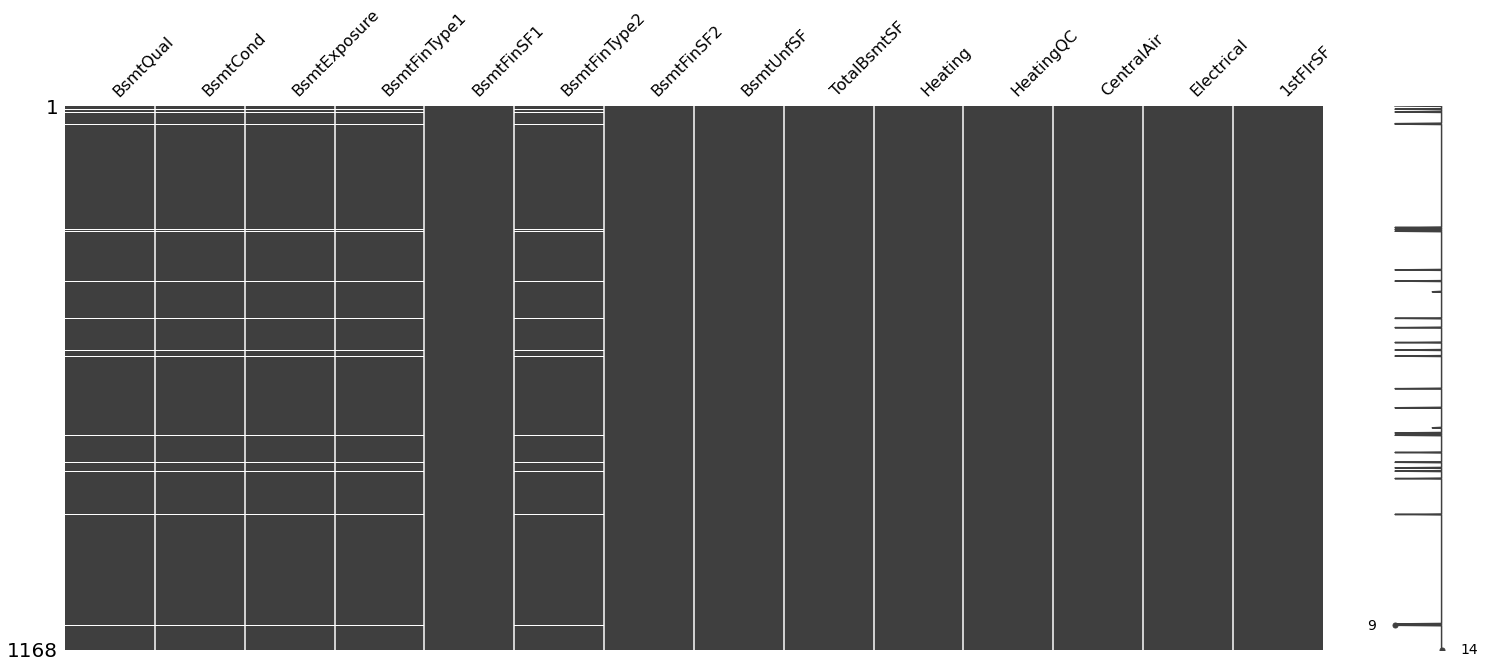

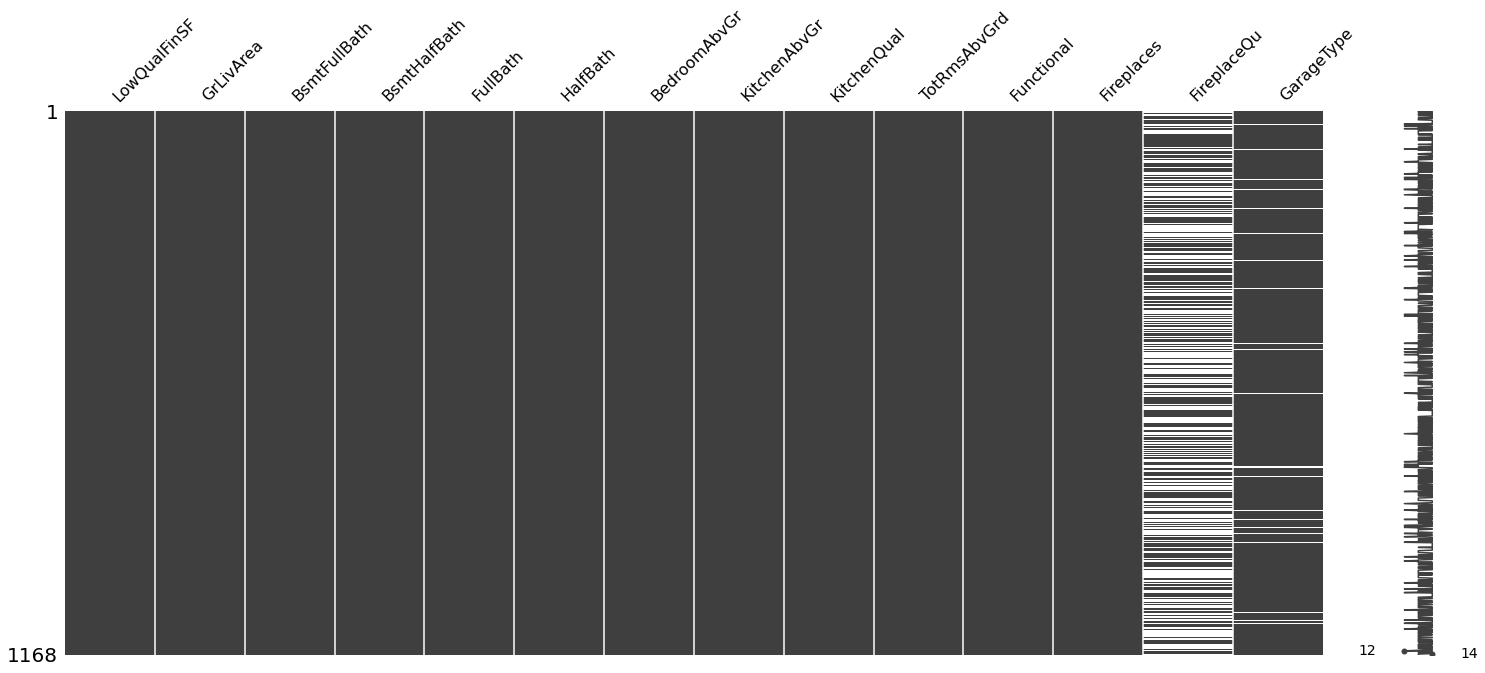

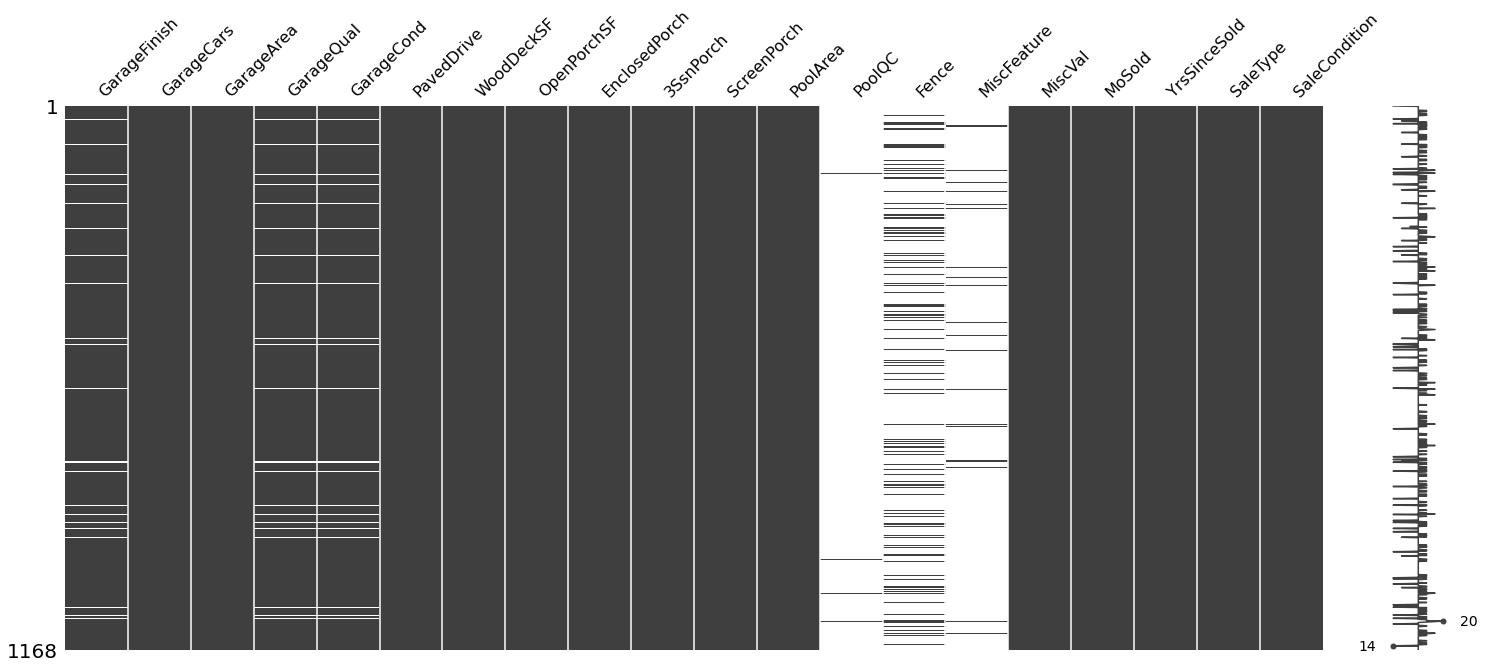

In [14]:
#####################################
### General Missing Visualization ###
#####################################

# Here we separate our data into 5 graphs for visibility; graphing too many
# columns at once hides the column names, rendering visualization less useful
# See Documentation for further explanation

msno.matrix(iowa_xtrain.iloc[:, 0:14])
msno.matrix(iowa_xtrain.iloc[:, 15:29])
msno.matrix(iowa_xtrain.iloc[:, 30:44])
msno.matrix(iowa_xtrain.iloc[:, 45:59])
msno.matrix(iowa_xtrain.iloc[:, 60:])

Text(0.5, 1.0, 'Heatmap of Missingness')

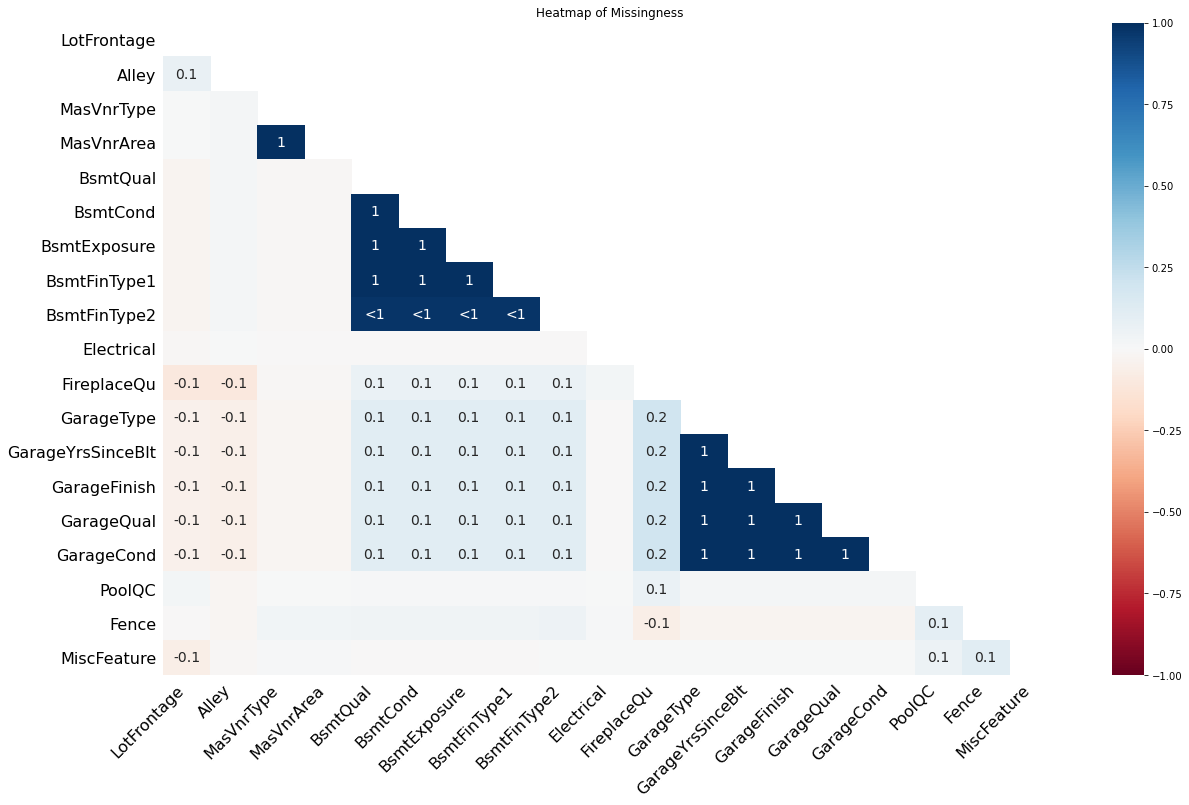

In [15]:
msno.heatmap(iowa_xtrain)
plt.title('Heatmap of Missingness')

# Missingness Results & Notes
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

With these visualizations, we can already begin to see a pattern arising between three distinct groups alongside several oddities.

- **Garage GROUP:** GarageType, GarageFinish, GarageQual, and GarageCond all are highly interrelated in their missingness, meaning that, if one is missing, the others necessarily will be as well.
- **Basement GROUP:** BsmtQual, BsmtCond, BsmtExposure, BsmtFinType2 are all similarly interrelated. BsmtExposure has one exception to this pattern.
- **Masonry GROUP:** MasVnrType & MasVnrArea have related missingness
- **FireplaceQu** has some significant missingness, but may be related to the Fireplaces category for later imputation
- **PoolQC, Fence, MiscFeature, Electrical, & LotFrontage** all have some missingness as well with no immediate relationships.
- **Alley** is almost entirely missing, likely making it irrelevant

In [16]:
# Organize Groups of data & include related features w/o missing data
gars = iowa_xtrain[['GarageType', 'GarageFinish', 'GarageYrsSinceBlt', 
                    'GarageQual', 'GarageCond','GarageCars', 'GarageArea']]
bsmt = iowa_xtrain[['BsmtQual', 'BsmtCond', 'BsmtExposure', 
                    'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']]
masn = iowa_xtrain[['MasVnrType', 'MasVnrArea']]


In [17]:
gars.head(5)

,GarageType,GarageFinish,GarageYrsSinceBlt,GarageQual,GarageCond,GarageCars,GarageArea
1179,NaN,NaN,NaN,NaN,NaN,0,0
755,Detchd,Unf,22.0,TA,TA,2,440
425,Detchd,Unf,74.0,TA,TA,1,240
761,Detchd,Unf,56.0,TA,TA,2,440
612,BuiltIn,RFn,20.0,TA,TA,2,531


In [18]:
gars.loc[gars['GarageType'].isna()]

,GarageType,GarageFinish,GarageYrsSinceBlt,GarageQual,GarageCond,GarageCars,GarageArea
1179,NaN,NaN,NaN,NaN,NaN,0,0
614,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
1173,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
562,NaN,NaN,NaN,NaN,NaN,0,0
1234,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1218,NaN,NaN,NaN,NaN,NaN,0,0


In [19]:
gars.loc[gars['GarageType'].isna()].describe()

,GarageYrsSinceBlt,GarageCars,GarageArea
count,0.0,64.0,64.0
mean,NaN,0.0,0.0
std,NaN,0.0,0.0
min,NaN,0.0,0.0
25%,NaN,0.0,0.0
50%,NaN,0.0,0.0
75%,NaN,0.0,0.0
max,NaN,0.0,0.0


In [20]:
gars['GarageType'].value_counts()

Attchd     687
Detchd     318
BuiltIn     73
Basment     15
CarPort      6
2Types       5
Name: GarageType, dtype: int64

### Garage Analysis

The data regarding garages is fairly robust in what is accounted for. Conversely, the missing data is all extremely *consistently* missing. That is to say that in 81 cases of missing data in at least the GarageType feature, there are no cases of any listed numerical data.

These patterns are suggestive then that any missing information in these Garage-related features merely indicates that the given house is missing a garage entirely. 

When we look into the data_description.txt file, we see that this is very likely the case considering it lists NA values, while those values fail to explicitly arise with the use of our .value_counts() method.

**Solution**: All that needs doing in the case of Garages, considering that the dataset is intended to include a lack of garage, we can fill these values with "None" without exception.

### Basement Investigation
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

Our surface-level examination of missing data suggests that we may be observing a similar pattern here as with the Garage situation: lack of properly input "missing" data.

In [21]:
bsmt.head(5)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
1179,NaN,NaN,NaN,NaN,NaN,0,0
755,Gd,TA,No,GLQ,Unf,348,729
425,TA,TA,No,Unf,Unf,651,651
761,TA,TA,Mn,LwQ,Unf,740,1145
612,Gd,TA,Av,GLQ,Unf,309,1299


In [22]:
bsmt.loc[bsmt['BsmtExposure'].isna()]
# use BsmtExposure b/c it seemed to have more missing data than others

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF
1179,NaN,NaN,NaN,NaN,NaN,0,0
984,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
1090,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
1048,NaN,NaN,NaN,NaN,NaN,0,0
868,NaN,NaN,NaN,NaN,NaN,0,0


In examining the **BsmtExposure** feature, we can see that everything seems consistent, save for the 948th house in the list. Therefore, we will want to be slightly careful here and examine value_counts() for both BsmtExposure and another column outside of it in order to confirm its unique missingness.

In [23]:
bsmt.loc[bsmt['BsmtExposure'].isna()].describe()

,BsmtUnfSF,TotalBsmtSF
count,27.0,27.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [24]:
bsmt.loc[bsmt['BsmtCond'].isna()].describe()

,BsmtUnfSF,TotalBsmtSF
count,27.0,27.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [25]:
# here we can see that NA values are not entered 
# as much as left empty upon data entry
bsmt['BsmtCond'].value_counts()

TA    1040
Gd      61
Fa      38
Po       2
Name: BsmtCond, dtype: int64

### Basement Analysis

As expected, we are indeed seeing much the same pattern in the case of Basement data as we did with Garage Data: that missing data generally indicate a missing Basement altogether. 

**Solution**: Firstly we impute the value for the uniquely missing BasementExposure value. For this point, we can fairly safely impute using the Mode value of the feature, considering its incredible predominance and the solitude of this particular value. Secondly we fill the remaining missing data with the appropriate "NA" marking referred to in the data_description.txt file.

### Masonry Investigation
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)


In [26]:
masn.head(5)

,MasVnrType,MasVnrArea
1179,None,0.0
755,BrkFace,894.0
425,None,0.0
761,None,0.0
612,BrkFace,108.0


In [27]:
masn.loc[masn['MasVnrType'].isna()]

,MasVnrType,MasVnrArea
1278,NaN,NaN
529,NaN,NaN
1243,NaN,NaN
936,NaN,NaN
973,NaN,NaN


### Masonry Analysis

Masonry once again, follows a similar pattern as the prior two missing groups. Rendering the solution likewise simple.

**Solution**: As with the above elements, we will fill NA's with an "NA" string category to better reflect the missing value. **MasVnrArea** will be converted along with numeric issues to 0.

### Other Oddities
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

There are several, disparate features missing data that arose alongside the grouped, missing data. Among them:
- Fireplace
- Electricity
- Fence
- MiscFeature

Most of these have fairly well-explained causes for their missing data, however, we will have to dig a little to see if they are true.

In [28]:
# Here we can see that, in all 690 cases of missing "FireplaceQu" data,
# the number of fireplaces is always 0, suggesting that FireplaceQu
# missing data merely reflect there being no fireplace in the first place
iowa_xtrain[['Fireplaces', 'FireplaceQu']].loc[iowa_xtrain['FireplaceQu'].isna()].describe()

,Fireplaces
count,559.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [29]:
# The absence of data here is fairly simply explained: the house does 
# not have electricity
iowa_xtrain.loc[iowa_xtrain['Electrical'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrsSinceSold,SaleType,SaleCondition
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,13,WD,Normal


In [30]:
# The data description provides for missing data, classed as "NA", however,
# the unique values do not reflect a missing fence. This suggests that all
# missing data here can be filled fairly harmlessly with "NA" text.
iowa_xtrain['Fence'].unique()

array([nan, 'GdWo', 'MnPrv', 'GdPrv', 'MnWw'], dtype=object)

In [31]:
iowa_xtrain['MiscFeature'].value_counts()

Shed    39
Gar2     2
Othr     1
TenC     1
Name: MiscFeature, dtype: int64

In [32]:
# nan values seem reflective of the listed none values in the data
# descriptions and so may be filled harmlessly
iowa_xtrain['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)


## Corrections Agenda
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

#### Categorical Corrections
Electrical --> Mode value

Otherwise, nan's --> NA

#### Numerical Corrections
MasVnrArea, GarageYrsSinceBuilt --> 0

LotFrontage --> Median

#### Judicial Engineering

In terms of our judicious approach to feature engineering, we have two main options: either an inclusive approach or an exclusive approach. As we are planning to apply PCA following our scaling of the data, it may be in our best interest to be inclusive for the time being, to be less choosy in this the early stage of our engineering. Thus we will only remove the following characteristics:
- Id
- BsmtFinSF1 & BsmtFinSF2 (secondary to TotalBsmtSF)
- 1stFlrSF1 & 2ndFlrSF2 (secondary to GrLivArea)

In [33]:
from sklearn.impute import SimpleImputer

# train & pickle LotFrontage imputer separately
imputer = SimpleImputer(strategy='median')
imputer.fit(iowa_xtrain[['LotFrontage']])
pickle.dump(imputer, open('./imputer.pkl', 'wb'))

def secondary_correction(df, LFImputer):
    ###########################################
    ### Categorical Missingness Corrections ###
    ###########################################

    # Electrical nan's --> 'Mode'
    df['Electrical'].fillna(df['Electrical'].value_counts().index[0], 
                                     inplace=True)
    # Fill nan's --> 'NA'
    na_features = ['GarageType', 'GarageFinish', 'Fence',
                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                  'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                  'Fence', 'MiscFeature', 'MasVnrType',
                  'Alley', 'PoolQC', 'GarageQual',
                  'GarageCond']
    for feature in na_features:
        df[feature] = df[feature].fillna('NA')

    #########################################
    ### Numerical Missingness Corrections ###
    #########################################

    # Fill nan's --> 0
    zero_features = ['MasVnrArea', 'GarageYrsSinceBlt']
    for feature in zero_features:
        df[feature].fillna(0, inplace=True)
    # Fill LotFrontage --> Median
    df['LotFrontage'] = LFImputer.transform(df[['LotFrontage']])

    ######################################
    ### Remove Logically Noisy Columns ###
    ######################################
    df.drop(['Id', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF'], 
                    axis=1, inplace=True)
    return df

In [34]:
iowa_xtrain = secondary_correction(iowa_xtrain, imputer)
iowa_xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrsSinceSold,SaleType,SaleCondition
1179,20,RL,77.0,8335,Pave,NA,Reg,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,4,15,WD,Normal
755,160,FV,34.0,3230,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,3,12,WD,Normal
425,60,RM,60.0,3378,Pave,Grvl,Reg,HLS,AllPub,Inside,...,0,0,NA,NA,NA,0,9,12,WD,Normal
761,30,RM,60.0,6911,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,10,12,WD,Normal
612,60,RL,69.0,11885,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,11,12,WD,Normal


Congratulations! That has eliminated all missing data thus far!

In [35]:
iowa_xtrain.isna().sum().sum()

0

# Encoding & Processing
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

As we will be using encoding processes that return reset indices, we will take care of some quick housekeeping by resetting our indices across all of our data.

In [36]:
# Housekeeping & Review
iowa_xtrain.reset_index(drop=True, inplace=True)
iowa_ytrain.reset_index(drop=True, inplace=True)
iowa_xtest.reset_index(drop=True, inplace=True)
iowa_ytest.reset_index(drop=True, inplace=True)
iowa_xtrain.shape

(1168, 75)

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# detail NOMINALLY categorical features
nom_cats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 
           'Utilities', 'LotConfig', 'Neighborhood', 'Condition2',
           'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
           'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 
           'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'GarageType',
           'PavedDrive', 'Fence', 'MiscFeature','MoSold', 'SaleType', 'SaleCondition',
           'PoolQC']

# train nominal encoder: OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(iowa_xtrain[nom_cats])
pickle.dump(ohe, open('ohe.pkl', 'wb'))

#  detail ORDINALLY categorical features
ord_cats = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Functional',
           'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
           'GarageQual', 'GarageCond']
# Associate it_ord_cats with ORDERED values
ord_groups = {'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
             'LandSlope': ['Sev', 'Mod', 'Gtl'],
             'ExterQual': ['Fa', 'TA', 'Gd', 'Ex'],
             'KitchenQual': ['Fa', 'TA', 'Gd', 'Ex'],
             'ExterCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             'HeatingQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
             'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
             'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             'BsmtQual': ['NA', 'Fa', 'TA', 'Gd', 'Ex'],
             'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd'],
             'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
             'GarageQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
             'GarageCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']}

# train ordinal encoder: OrdinalEncoder
col_cats = [ord_groups[i] for i in ord_cats]
ord_encoder = OrdinalEncoder(categories=col_cats, 
                             handle_unknown='use_encoded_value', 
                             unknown_value = -1)
ord_encoder.fit(iowa_xtrain[ord_cats])
pickle.dump(ord_encoder, open('./ordinal.pkl', 'wb'))

def encoding_pass(df, noms, nominal_enc, ords, ordinal_enc):
    # Extrapolate New NOMINAL Column Name list from nominal_encoder categories
    new_nominal_names = []
    for i, col in enumerate(df[noms].columns):
        j = 0
        while j < len(nominal_enc.categories_[i]):
            new_nominal_names.append(f'{col}_{nominal_enc.categories_[i][j]}')
            j += 1
    
    # Get & concat pd.DataFrame of encoded nominal values
    encoded_nominals = pd.DataFrame(nominal_enc.transform(df[noms]),
                                       columns=new_nominal_names)
    df.drop(noms, axis=1, inplace=True)              #drop vals from df
    df = pd.concat([df, encoded_nominals], axis=1)     #concat df & encoded vals
    
    # Get & concat pd.DataFrame of encoded ordinal values
    encoded_ordinals = pd.DataFrame(ordinal_enc.transform(df[ords]),
                                   columns=ords)      #only needs ords, no new cols made
    df.drop(ords, axis=1, inplace=True)               #drop vals from df
    df = pd.concat([df, encoded_ordinals], axis=1)      #concat df & encoded vals
    return df

In [38]:
iowa_xtrain = encoding_pass(iowa_xtrain, noms=nom_cats, nominal_enc=ohe,
                           ords=ord_cats, ordinal_enc=ord_encoder)
print('Shape of things to come: ' + str(iowa_xtrain.shape))
print('Extant Missingness: ' + str(iowa_xtrain.isna().sum().sum()))

Shape of things to come: (1168, 265)
Extant Missingness: 0


From here we can safely apply our procedures to the x_test data as well

In [39]:
iowa_xtest = initial_corrections(iowa_xtest)
iowa_xtest = secondary_correction(iowa_xtest, imputer)
iowa_xtest = encoding_pass(iowa_xtest, noms=nom_cats, nominal_enc=ohe,
                          ords=ord_cats, ordinal_enc=ord_encoder)
print('Shape of things to come: ' + str(iowa_xtest.shape))
print('Extant Missingness: ' + str(iowa_xtest.isna().sum().sum()))

Shape of things to come: (292, 265)
Extant Missingness: 0


# Bivariate Investigation & Processing

In [40]:
def bivariate_plotting(df):
    # define graphical bounds
    rows = int(np.ceil(len(df.columns) / 3))
    fig, axs = plt.subplots(rows, 3, figsize = (12, (4 * rows)))
    
    # use Seaborne to plot both Numerical & Categorical Features
    for ax, feature in zip(axs.flat, df.columns.to_list()):
        sns.scatterplot(x=iowa_xtrain[feature],
                       y=iowa_ytrain['SalePrice'], ax=ax)

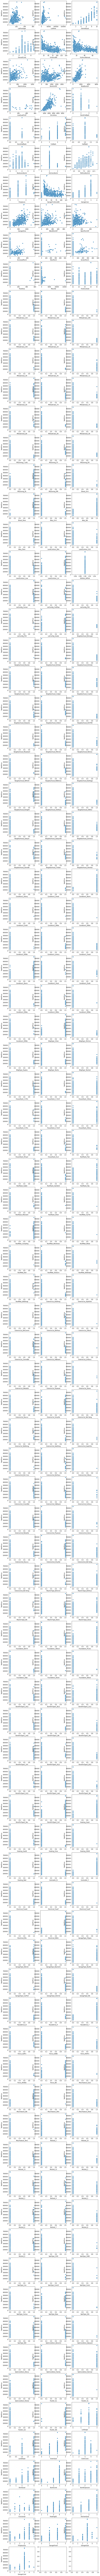

In [41]:
bivariate_plotting(iowa_xtrain)

# Final Preparation for Export
[[Back to Top]](#Iowa-Housing-Pricing:-Data-Cleaning-&-Prep)

Thus far we have effectively cleaned, prepped, & scaled the initial training set of our data.

In [42]:
#####################################
### Export Train & TrainTest DF's ###
#####################################

# iowa_xtrain.to_csv('ITrain_DSet.csv')
# iowa_ytrain.to_csv('ITrain_Test.csv')
# iowa_xtest.to_csv('ITTest_DSet.csv')
# iowa_ytest.to_csv('ITTest_Test.csv')

In the next notebook we will import these data, bottle and process our cleaning procedure, apply it first to our test data, then run it through a proper simulation with the provided Kaggle data.

In [55]:
testset = pd.read_csv('test.csv')
iowa_finaltest = initial_corrections(testset)

In [56]:
iowa_finaltest = secondary_correction(iowa_finaltest, imputer)

In [57]:
iowa_finaltest.isna().sum().sum()

20

In [64]:
iowa_finaltest.loc[:, iowa_finaltest.isna().sum() > 0]

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,RH,AllPub,VinylSd,VinylSd,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,RL,AllPub,VinylSd,VinylSd,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,RL,AllPub,VinylSd,VinylSd,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,RL,AllPub,HdBoard,HdBoard,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,546.0,546.0,0.0,0.0,TA,Typ,0.0,0.0,WD
1455,RM,AllPub,CemntBd,CmentBd,294.0,546.0,0.0,0.0,TA,Typ,1.0,286.0,WD
1456,RL,AllPub,VinylSd,VinylSd,0.0,1224.0,1.0,0.0,TA,Typ,2.0,576.0,WD
1457,RL,AllPub,HdBoard,Wd Shng,575.0,912.0,0.0,1.0,TA,Typ,0.0,0.0,WD


In [65]:
iowa_finaltest.loc[iowa_finaltest['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrsSinceSold,SaleType,SaleCondition
455,30,NaN,109.0,21780,Grvl,NA,Reg,Lvl,NaN,Inside,...,0,0,NA,NA,NA,0,3,12,ConLD,Normal
756,20,NaN,80.0,14584,Pave,NA,Reg,Low,AllPub,Inside,...,0,0,NA,NA,NA,0,2,13,WD,Abnorml
790,70,NaN,69.0,56600,Pave,NA,IR1,Low,AllPub,Inside,...,0,0,NA,NA,NA,0,1,13,WD,Normal
1444,20,NaN,125.0,31250,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,5,15,WD,Normal


In [53]:
iowa_finaltest = encoding_pass(iowa_finaltest, noms=nom_cats, nominal_enc=ohe,
                           ords=ord_cats, ordinal_enc=ord_encoder)

ValueError: Input contains NaN